In [15]:
# Import Scikit-Learn module
from sklearn.linear_model import LinearRegression
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

model = LinearRegression()

# Load the California Housing Dataset
from sklearn.datasets import fetch_california_housing
sklearn.set_config(print_changed_only=True)

# Arrange the dataset into features and target
california = fetch_california_housing()
X, y = california.data, california.target

# Display the dataset description
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

/tmp/ipykernel_199/1898964624.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Displaying the first 5 rows of the DataFrame to verify

In [16]:
# Obtain a DataFrame for the California house pricing data
df = pd.DataFrame(data=california.data, columns = california.feature_names)
df['price'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


From the dataset description we note that the features and target column are numerical values and hence we can directly apply the Linear Regression Model to the dataset.
Let us obtain the scatter plot of features vs the median price to understand the relation of price with respect to individual features.

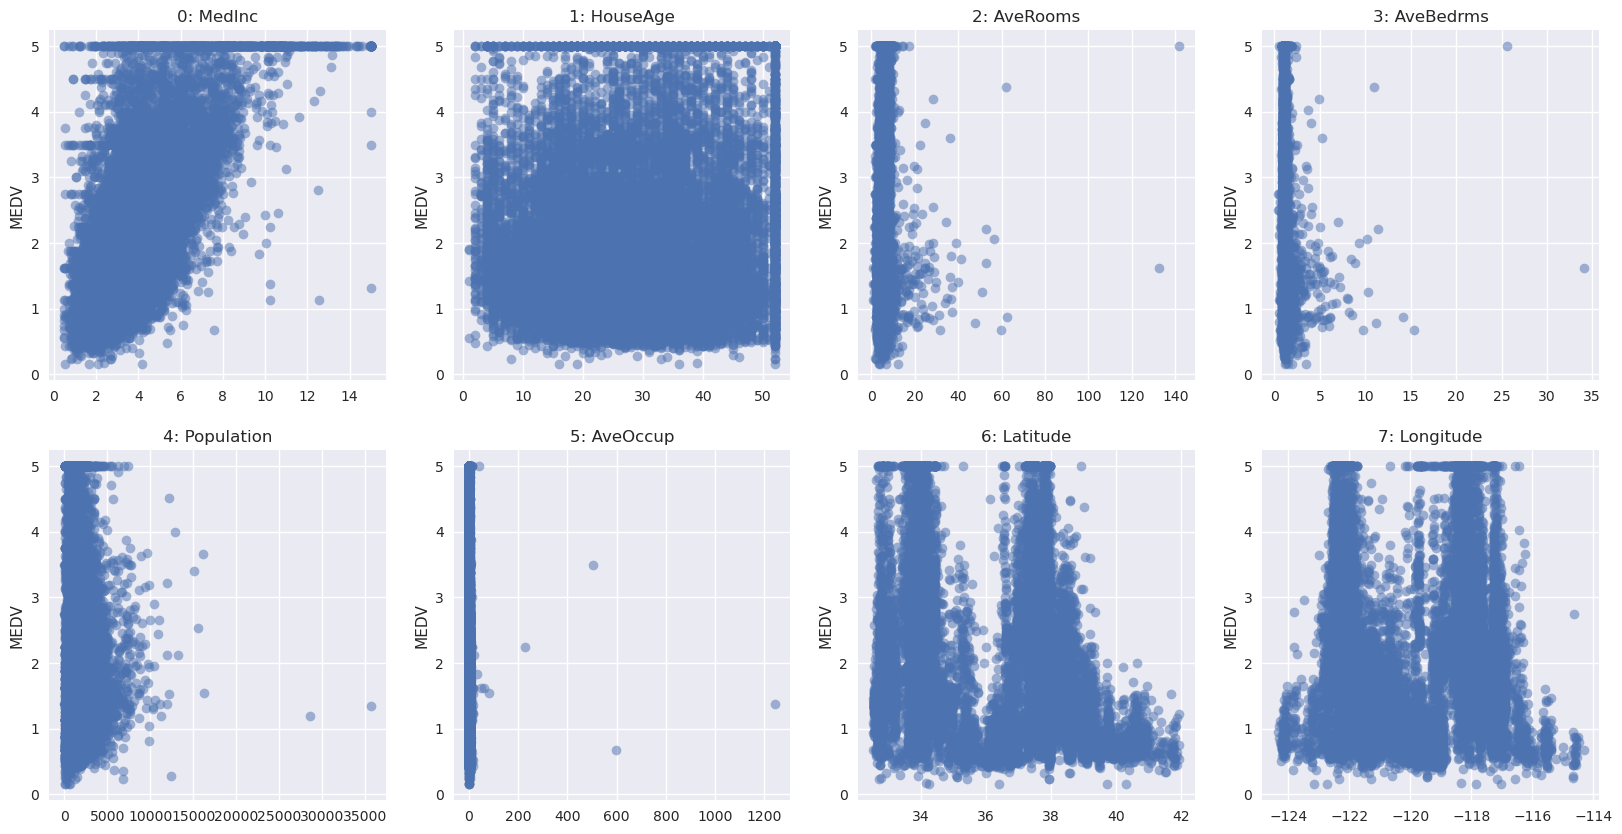

In [17]:
# Scatter plot of features
fig, axes = plt.subplots(2,4, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=0.5)
    ax.set_title("{}: {}".format(i, california.feature_names[i]))
    ax.set_ylabel("MEDV")

In [18]:
# Verify the number of datapoints for X and y
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


Now the datapoints have been verified.
Next, proceed with the train_test_split. As we had already instantiated a Linear Regression model we can fit the model on the training dataset.

In [19]:
# Perform the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the Regression model
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Obtain the model predictions for the test dataset
y_pred = model.predict(X_test)

# Obtain the R-squared performance metric
train_score_lr = model.score(X_train, y_train)
test_score_lr = model.score(X_test, y_test)

print("The train score for linear regression model is: ", np.round(train_score_lr, 2))
print("The test score for linear regression model is: ", np.round(test_score_lr, 2))

The train score for linear regression model is:  0.61
The test score for linear regression model is:  0.59


More detailed insights to analyze the residuals

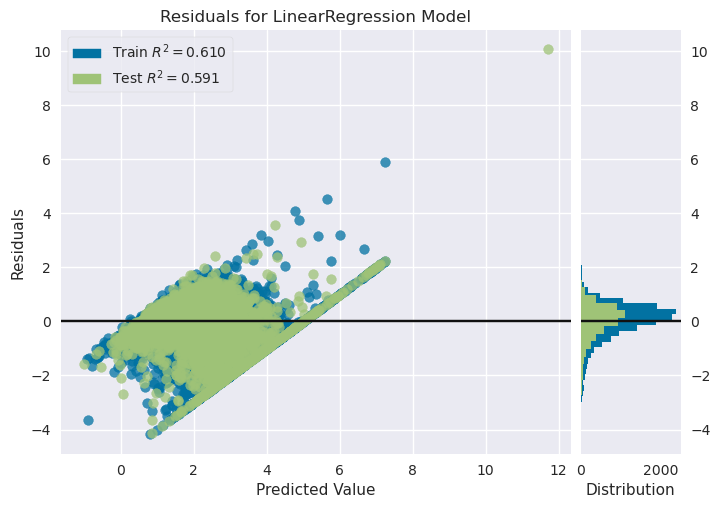

In [21]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

We notice that the model performance is better on the train dataset than test dataset.
We can further improve the model performance with the help of regularization (hyperparameter tuning).

L2 regularization is used to control the fit of the model by penalizing it for errors.It adds in a weighted loss function as an additional term to control the fitting/learning of the model.

Ridge regression using GridSearchCV

In [22]:
# import the required packages
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [23]:
# Declare the range of alpha for which you need to run the model
param_grid = {'alpha': np.logspace(-3, 3, 9)}
print(param_grid)

{'alpha': array([1.00000000e-03, 5.62341325e-03, 3.16227766e-02, 1.77827941e-01,
       1.00000000e+00, 5.62341325e+00, 3.16227766e+01, 1.77827941e+02,
       1.00000000e+03])}


In [24]:
# Create a grid and fit the dataset
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

# Obtain the model parameters with highest scores
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.6062585583277668


Let us plot the test and train scores for the grid to analyze the performance of the regression with 
respect to value of alpha.

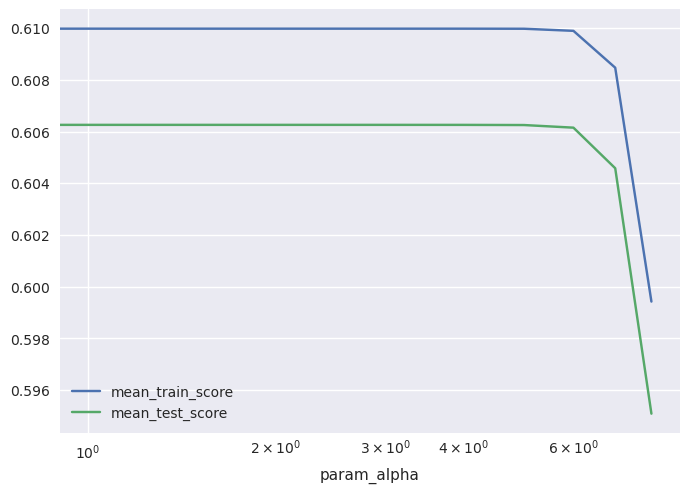

In [25]:
# Convert the grid results into a DataFrame and plot the train and test scores
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()

# Provide the legend to plot and convert x-axis to logarithmic scale
plt.xscale("log")

Let us build a Ridge regression model with the parameters returned by GridSearchCV, alpha=0.01, and check the scores of the developed model for the test split performed in the original train_test_split

In [31]:
# Create a ridge model with alpha = 0.01
ridge = Ridge(alpha=0.001).fit(X_train, y_train)

# Obtain the model predictions for the test dataset
y_pred = ridge.predict(X_test)

# Obtain the R-squared performance metric
train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)

print("The train score for ridge regression model is: ", np.round(train_score_ridge, 2))
print("The test score for ridge regression model is: ", np.round(test_score_ridge, 2))

The train score for ridge regression model is:  0.68
The test score for ridge regression model is:  0.66


From these scores we can say that there is no observable difference in the scores. This is largely due to the small value of alpha. Let us proceed with some feature engineering to further improve the regression.

# Feature Engineering

As we saw in the scatterplot a lot of features did not display a clear relationship to the price. Let us use Polynomial Feature Transform for preprocessing

In [32]:
# Import the required packages
from sklearn.preprocessing import PolynomialFeatures, scale

# Generate polynomial features
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))

# Check the shape of the generated feature set
print(X_poly.shape)

# Perform the train test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(20640, 44)


Now that we have improved feature set. Let us analyze the impact of the feature engineering on linear regression

In [33]:
# Develop the cross validation based linear regression model and obtain mean score
linear_score = np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

print("R-squared score for the feature engineered regression model is: ", linear_score)

R-squared score for the feature engineered regression model is:  -75.8129987457398


Negative R2 value means that the data fits the model very poorly.

Now, let us examine the performance of the ridge regression model on the feature engineered dataset

In [35]:
# Create a grid and fit the dataset
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

# Obtain the model parameters with highest scores
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1000.0}
0.5300045036875419


Let us plot the test and train scores for the grid to analyze the performance of the regression with respect to value of 𝛼.

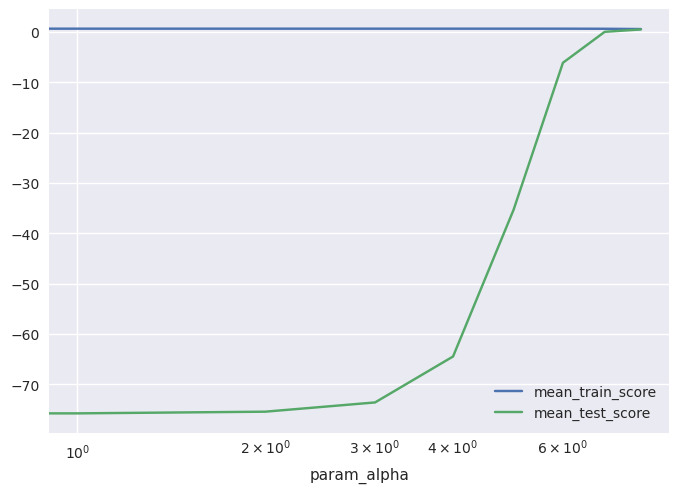

In [36]:
# Convert the grid results into a DataFrame and plot the train and test scores
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()

# Provide legend to plot and convert x-axis to logarithmic scale
plt.xscale("log")

We observe that the train set accuracy remains constant but the test set accuracu first remains constant and then increases.

Now, let us build a Ridge regression model with the parameters returned by GridSearchCV $\alpha = 1000$ and check the scores of the developed model for the test split performed in the original `train_test_split`.

In [38]:
# Create a ridge model with alpha=14.25
ridge = Ridge(alpha=1000).fit(X_train, y_train)

# Obtain the model predictions for the test dataset
y_pred = ridge.predict(X_test)

# Obtain the R-Squared performace metric
train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)

print("The train score for feature engineered ridge regression model is: ", np.round(train_score_ridge, 2))
print("The test score for feature engineered ridge regression model is: ", np.round(test_score_ridge, 2))

The train score for feature engineered ridge regression model is:  0.61
The test score for feature engineered ridge regression model is:  0.58


The performance remains same.
Lets see how the regression model coefficients vary with variation in the value of alpha.

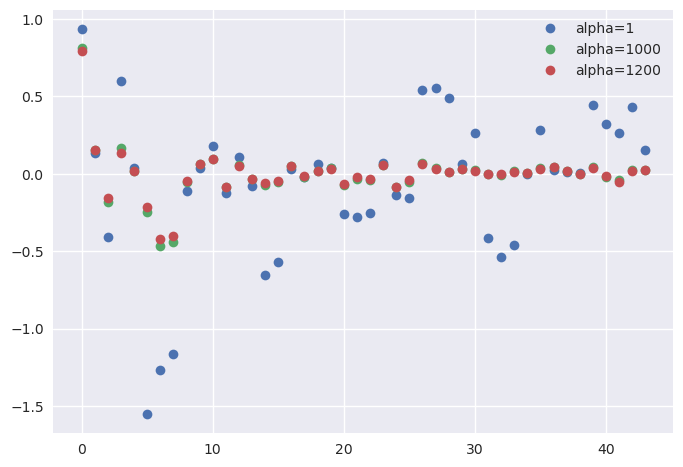

In [39]:
# Develop ridge models for various values of alpha
ridge1200 = Ridge(alpha=1200).fit(X_train, y_train)
ridge1000 = Ridge(alpha=1000).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)

# Plot the coefficients for the various ridge models
plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge1000.coef_, 'o', label="alpha=1000")
plt.plot(ridge1200.coef_, 'o', label="alpha=1200")
plt.legend();

From the above plot we can observe that with higher values of $\alpha$ the value of coefficients strat to diminish thereby producing lower performance scores for the regression model.